In [91]:
import pandas as pd
data = pd.read_csv("Food_Delivery_Time_Prediction.csv")
data.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [93]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
# Weather_Conditions Traffic_Conditions Vehicle_Type
data['Weather_Conditions']= label.fit_transform(data['Weather_Conditions'])
data['Traffic_Conditions'] = label.fit_transform(data['Traffic_Conditions'])
data['Vehicle_Type'] = label.fit_transform(data['Vehicle_Type'])
data

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,Medium,Afternoon,2,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,Low,Night,2,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,High,Night,1,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,Medium,Evening,1,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,Low,Night,1,3.5,2.8,32.38,619.81,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,0,0,8,Medium,Night,1,4.7,4.0,50.39,1432.26,66.34
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,2,8,Low,Night,0,3.0,3.6,90.54,1720.25,40.27
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,0,4,Medium,Afternoon,1,2.9,3.4,73.20,1356.58,5.10
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,0,9,Low,Night,2,3.9,4.8,53.94,354.39,85.25


In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Distance', 'Delivery_Time']] = scaler.fit_transform(data[['Distance', 'Delivery_Time']])


In [97]:
data['cust_lat'] = data['Customer_Location'].str.strip("()").str.split(",").str[0].astype(float)


In [99]:
data['cust_long'] = data['Customer_Location'].str.strip("()").str.split(",").str[1].astype(float)


In [101]:
data['rest_lat'] = data['Restaurant_Location'].str.strip("()").str.split(",").str[0].astype(float)


In [103]:
data['rest_long'] = data['Restaurant_Location'].str.strip("()").str.split(",").str[1].astype(float)


In [61]:
# Convert latitude and longitude columns to float


In [105]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])  # Convert degrees to radians

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c  # Distance in km

data['distance_km'] = data.apply(lambda row: haversine(row['cust_lat'], row['cust_long'], row['rest_lat'], row['rest_long']), axis=1)


In [123]:

data["Delivery_Time"].dtype

dtype('float64')

In [125]:
print(data["Delivery_Time"].isna().sum())  # Count NaN values


0


In [129]:
data["Delivery_Time"].max()

1.0

In [131]:
data["Delivery_Time"].min()

0.0

In [135]:
import numpy as np

data["Delivery_status"] = np.where(data["Delivery_Time"] >0.7, 1,0)
data


,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,...,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,cust_lat,cust_long,rest_lat,rest_long,distance_km,Delivery_status
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.043068,1,2,4,Medium,Afternoon,2,...,3.0,0.105228,1321.10,81.54,17.030479,79.743077,12.358515,85.100083,775.651198,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.853158,0,2,8,Low,Night,2,...,4.2,0.453658,152.21,29.02,15.398319,86.639122,14.174874,77.025606,1042.385597,0
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.263741,2,2,9,High,Night,1,...,3.4,0.317886,1644.38,64.17,15.687342,83.888808,19.594748,82.048482,476.220706,0
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.544299,0,1,2,Medium,Evening,1,...,3.7,0.923018,541.25,79.23,20.415599,78.046984,16.915906,78.278698,389.912629,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.254307,1,0,6,Low,Night,1,...,2.8,0.164209,619.81,2.34,14.786904,78.706532,15.206038,86.203182,806.505886,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",0.955701,0,0,8,Medium,Night,1,...,4.0,0.336653,1432.26,66.34,17.910045,81.561990,18.098924,87.896124,670.130652,0
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",0.228466,2,2,8,Low,Night,0,...,3.6,0.721084,1720.25,40.27,21.664590,82.226635,16.892341,80.554716,558.891202,1
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",0.824036,2,0,4,Medium,Afternoon,1,...,3.4,0.555056,1356.58,5.10,14.575401,82.556410,13.625369,82.418092,106.686689,0
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",0.965546,1,0,9,Low,Night,2,...,4.8,0.370643,354.39,85.25,12.094497,82.893369,19.135509,86.659978,880.580093,0


In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 🔹 Features (X) and Target (y)
X = data[['Delivery_Time', 'Distance']]
y = data['Delivery_status']

# 🔹 Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Train Gaussian Naïve Bayes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 🔹 Predictions
y_pred = gnb.predict(X_test)

# 🔹 Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 🔹 Display Results
print(f"🔹 Accuracy: {accuracy:.2f}")
print("\n🔹 Confusion Matrix:")
print(conf_matrix)
print("\n🔹 Classification Report:")
print(report)

🔹 Accuracy: 0.97

🔹 Confusion Matrix:
[[29  0]
 [ 1 10]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40



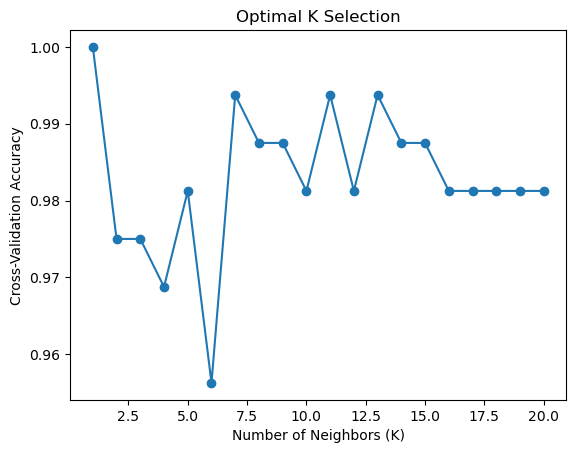

Best K: 1
🔹 Accuracy: 0.97

🔹 Confusion Matrix:
[[28  1]
 [ 0 11]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.92      1.00      0.96        11

    accuracy                           0.97        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

X = data[['Delivery_Time', 'Distance']]
y = data['Delivery_status']

# 🔹 Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold CV
    cv_scores.append(scores.mean())

# 🔹 Plot Cross-Validation Results
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Optimal K Selection')
plt.show()

# 🔹 Select the best K (highest accuracy)
best_k = k_values[np.argmax(cv_scores)]
print(f"Best K: {best_k}")

# 🔹 Train KNN Classifier with Best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# 🔹 Predictions
y_pred = knn.predict(X_test)

# 🔹 Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 🔹 Display Results
print(f"🔹 Accuracy: {accuracy:.2f}")
print("\n🔹 Confusion Matrix:")
print(conf_matrix)
print("\n🔹 Classification Report:")
print(report)

🔹 Accuracy: 1.00

🔹 Confusion Matrix:
[[40]]

🔹 Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


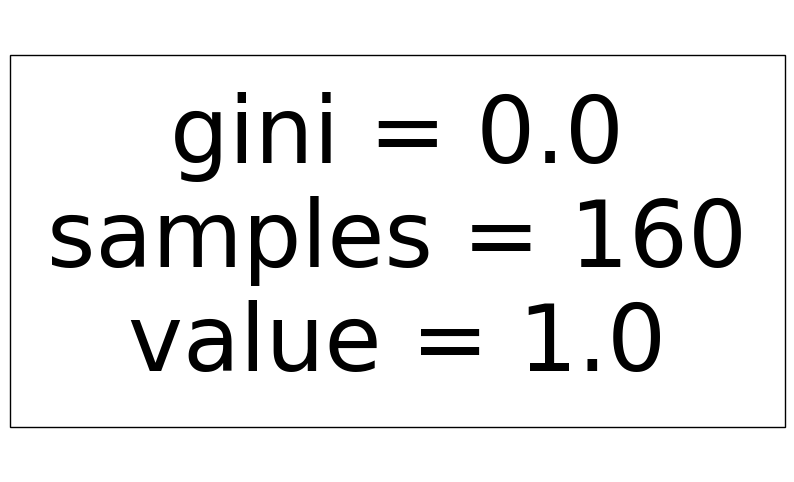

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 🔹 Features (X) and Target (y)
X = data[['Delivery_Time', 'Distance']]
y = data['Delivery_status']

# 🔹 Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Train a Basic Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# 🔹 Predictions
y_pred = tree_clf.predict(X_test)

# 🔹 Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"🔹 Accuracy: {accuracy:.2f}")
print("\n🔹 Confusion Matrix:")
print(conf_matrix)
print("\n🔹 Classification Report:")
print(report)

# 🔹 Visualize Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(tree_clf, feature_names=X.columns, class_names=["Delayed", "Fast"], filled=True)
plt.show()



🔹 Naïve Bayes Performance:
Accuracy: 0.97
Confusion Matrix:
[[29  0]
 [ 1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40


🔹 KNN Performance:
Accuracy: 0.97
Confusion Matrix:
[[29  0]
 [ 1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40


🔹 Decision Tree Performance:
Accuracy: 1.00
Confusion Matrix:
[[29  0]
 [ 0 11]]
Classification Report:
              precision    recall  f1-score

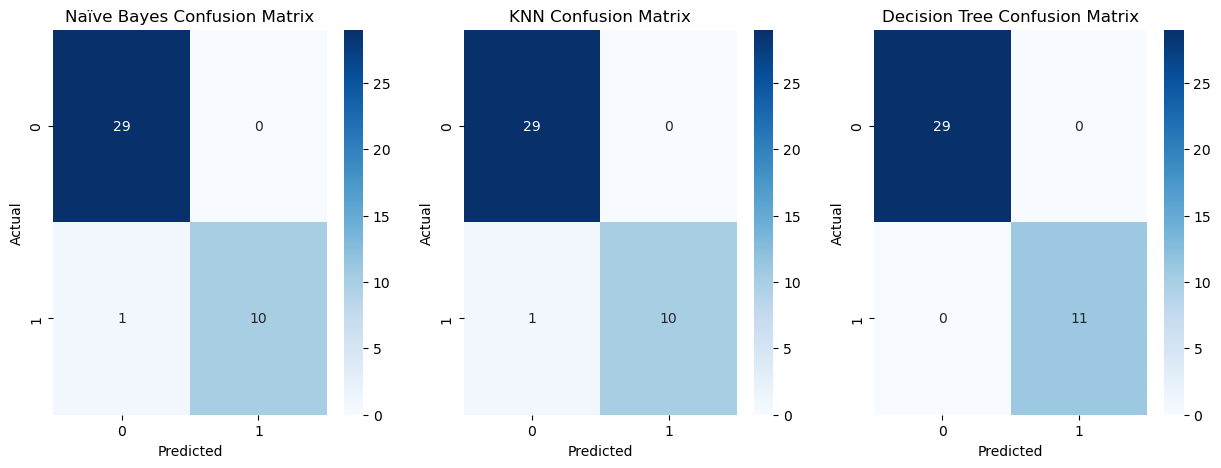

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# 🔹 Sample Data


# 🔹 Features & Target
X = data[['Delivery_Time', 'Distance']]
y = data['Delivery_status']

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Standardization (for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Model Initialization
models = {
    "Naïve Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42)
}

# 🔹 Dictionary to Store Results
results = {}

# 🔹 Train, Predict, and Evaluate
for name, model in models.items():
    if name == "KNN":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {"accuracy": acc, "conf_matrix": cm, "report": report}

    print(f"\n🔹 {name} Performance:")
    print(f"Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# 🔹 Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (name, res) in enumerate(results.items()):
    sns.heatmap(res["conf_matrix"], annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.show()
